In [1]:
import sys
sys.path.append('..')

from src import ALLSUBSETSUMS,bt_solution,device
import numpy as np
import time,random
from tqdm import tqdm,trange
import matplotlib.pyplot as plt

from scipy.stats import geom,poisson,randint
distri_name_dict={randint:'randint',geom:'geom',poisson:'poisson'}

def generate_nums(distribution,var,n):
    if distribution==randint:
        nums=distribution.rvs(0,var,size=n)
    else:
        nums=distribution.rvs(var,size=n)
    return nums

In [2]:
#check correctness by comparing to bt algorithm
def correctness_validation(batches, n, var = 100, distrbution=randint):
    f=open(f"../data/fft-subset_sum-{n}",'a+')
    for i in trange(batches):
        
        nums=generate_nums(distribution,var,n)
        print('numbers:\n',nums,file=f)
        
        maxsum=sum(nums)
        
        allsums=ALLSUBSETSUMS(nums,maxsum)
        
        for t in range(1,maxsum+1):
            bt_res=bt_solution(nums,t)
            print(f't={t}',bt_res,file=f)
            
                
            if (len(bt_res)==0 and t in allsums) or (len(bt_res)!=0 and t not in allsums):
                print('Failed!')
                f.close()
                return
    print('Success!')
    f.close()
#* each batch tests one array with size = n , and t from 1 to sum(array)
batches=100
#* size of the array
n=10
correctness_validation(batches,n)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:17<00:00,  5.67it/s]

Success!


In [5]:
# record 10 times calculating time

def test_time(nums,t)
    start_time = time.time()
    #10 times repeat
    for i in range(10):
        allsums=ALLSUBSETSUMS(nums,t)
    end_time = time.time()

    return end_time - start_time

def f(n,t,var,distribution):
    nums=generate_nums(distribution,var,n)
    return test_time(nums,t)

def time_rec(max_n,max_t, var = 10, distribution=randint):
    return np.array([[f(i,j, var = 10,distribution=distribution) for j in range(1,max_t+1)] for i in trange(2,max_n+1)])

#* n from 2 to max_n
max_n=20
#* t from 1 to max_t
max_t=500
#* 
distribution=randint
#* parameter of distribution
var=10
z=time_rec(max_n,max_t,var,distribution)
print('test finished!')



  0%|                                                                                                                                                                                | 0/19 [00:00<?, ?it/s]

  5%|████████▊                                                                                                                                                               | 1/19 [00:00<00:14,  1.21it/s]

 11%|█████████████████▋                                                                                                                                                      | 2/19 [00:02<00:20,  1.18s/it]

 16%|██████████████████████████▌                                                                                                                                             | 3/19 [00:03<00:22,  1.40s/it]

 21%|███████████████████████████████████▎                                                                                                                                    |

test finished!


In [6]:
# record time data
np.set_printoptions(threshold=np.inf)

with open(f"../experiments/fft-subset_sum-{device}-{max_n}-{max_t}-{distri_name_dict[distribution]}-{var}.txt", 'w') as f:
    print(
        f"device:{device}\nn_max:{max_n}\nt_max:{max_t}\ndistribution:{distri_name_dict[distribution]}\nvar:{var}\nz:\n{z}"
          ,file=f)
print('finished recording data!')

finished recording data!


  0%|                                                                                                                                                                                | 0/19 [05:57<?, ?it/s]


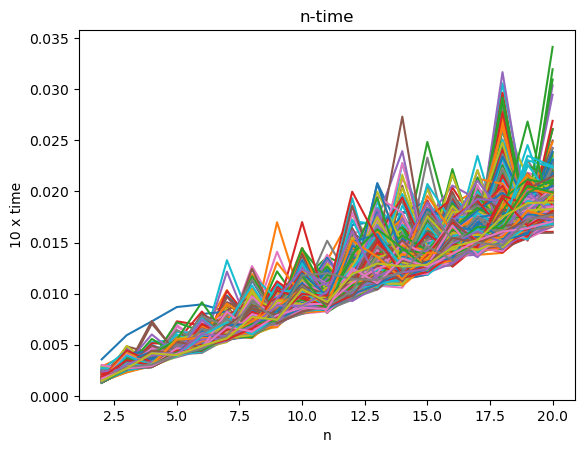

In [7]:
#draw n-time graph

from operator import itemgetter
n=np.array([i for i in range(2,max_n+1)])
t=np.array([i for i in range(1,max_t+1)])
z2=np.square(z)

plt.title("n-time")
plt.xlabel("n")
plt.ylabel("10 x time")
for t0 in range(max_t-1):
    plt.plot(n, list(map(itemgetter(t0),z)))
plt.savefig(f"../experiments/{device}-{max_n}-{max_t}-{distri_name_dict[distribution]}-{var}-n-time.png")

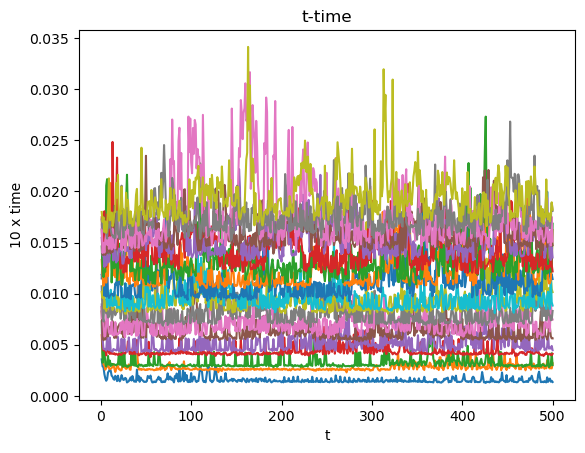

In [8]:
#draw t-time graph
plt.title("t-time")
plt.xlabel("t")
plt.ylabel("10 x time")
for n0 in range(max_n-1):
    plt.plot(t, z[n0], label=f"n {n0}")
plt.savefig(f"../experiments/{device}-{max_n}-{max_t}-{distri_name_dict[distribution]}-{var}-t-time.png")    